In [1]:
import pandas as pd
import plotly.graph_objects as go

In [2]:
# Grabbing "perfect" data
fast_flops = pd.read_excel('abaco_results.xlsx', sheet_name=0, header=1, usecols="AB:AR")
slow_flops = pd.read_excel('abaco_results.xlsx', sheet_name=0, header=1, usecols="AT:BJ")
hashes = pd.read_excel('abaco_results.xlsx', sheet_name=1, header=1, usecols="A:O")

In [3]:
# Grabbing autoscaler data
scaled_fast_flops = pd.read_excel('abaco_results.xlsx', sheet_name=2, header=1, usecols="AB:AR")
scaled_slow_flops = pd.read_excel('abaco_results.xlsx', sheet_name=2, header=1, usecols="AT:BJ")
scaled_hashes = pd.read_excel('abaco_results.xlsx', sheet_name=3, header=1, usecols="A:O")

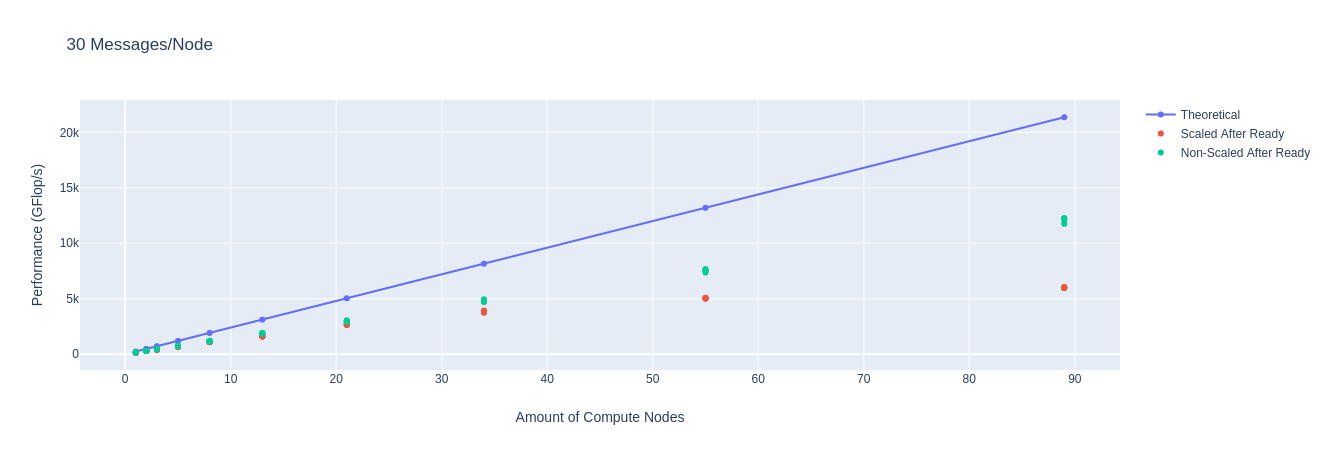

In [38]:
fig = go.Figure()
# 6 Cores (On Node) * 2.5GHz (From node cpuinfo) * 16 operations/cycle = 240GFLOPS estimate
nodes = [1,2,3,5,8,13,21,34,55,89]
theoretical = [int(x * 6 * 2.5 * 16) for x in nodes]
fig.add_trace(go.Scatter(x=nodes,
                         y=theoretical,
                         name='Theoretical'))

fig.add_trace(go.Scatter(x=scaled_fast_flops['Node/Actor(s)'],
                         y=scaled_fast_flops['GFlop/s Clock.3'],
                         mode='markers',
                         name='Scaled After Ready'))

fig.add_trace(go.Scatter(x=fast_flops['Node/Actor(s)'],
                         y=fast_flops['GFlop/s Clock.3'],
                         mode='markers',
                         name='Non-Scaled After Ready'))

fig.update_layout(
    title=go.layout.Title(text="30 Messages/Node"),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(text="Amount of Compute Nodes")),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(text="Performance (GFlop/s)")))

fig

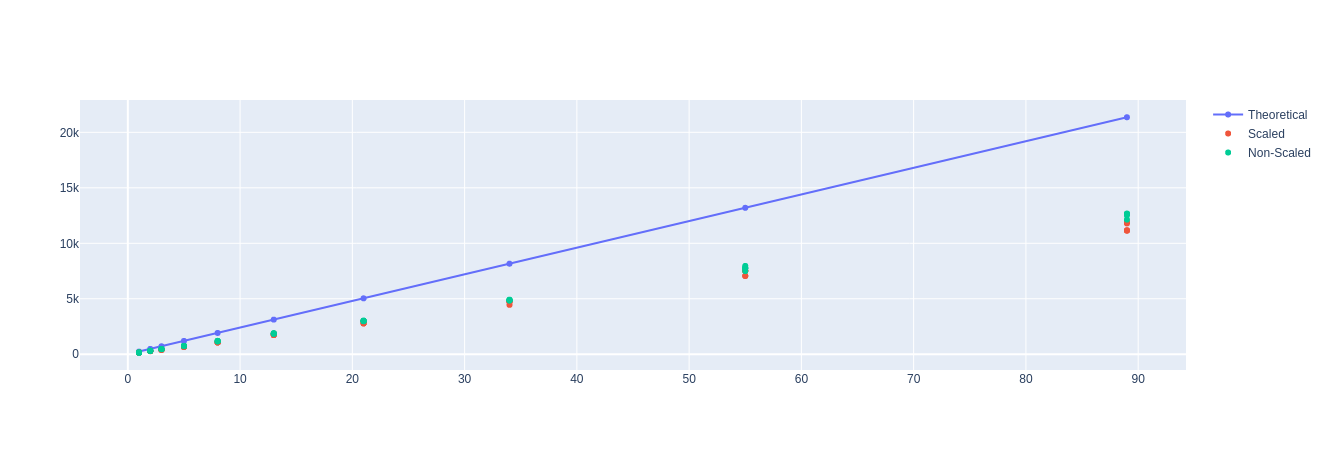

In [32]:
fig = go.Figure()
# 6 Cores (On Node) * 2.5GHz (From node cpuinfo) * 16 operations/cycle = 240GFLOPS estimate
nodes = [1,2,3,5,8,13,21,34,55,89]
theoretical = [int(x * 6 * 2.5 * 16) for x in nodes]
fig.add_trace(go.Scatter(x=nodes,
                         y=theoretical,
                         name='Theoretical'))

fig.add_trace(go.Scatter(x=scaled_slow_flops['Node/Actor(s).1'],
                         y=scaled_slow_flops['GFlop/s Clock.4'],
                         mode='markers',
                         name='Scaled'))

fig.add_trace(go.Scatter(x=slow_flops['Node/Actor(s).1'],
                         y=slow_flops['GFlop/s Clock.4'],
                         mode='markers',
                         name='Non-Scaled'))

fig

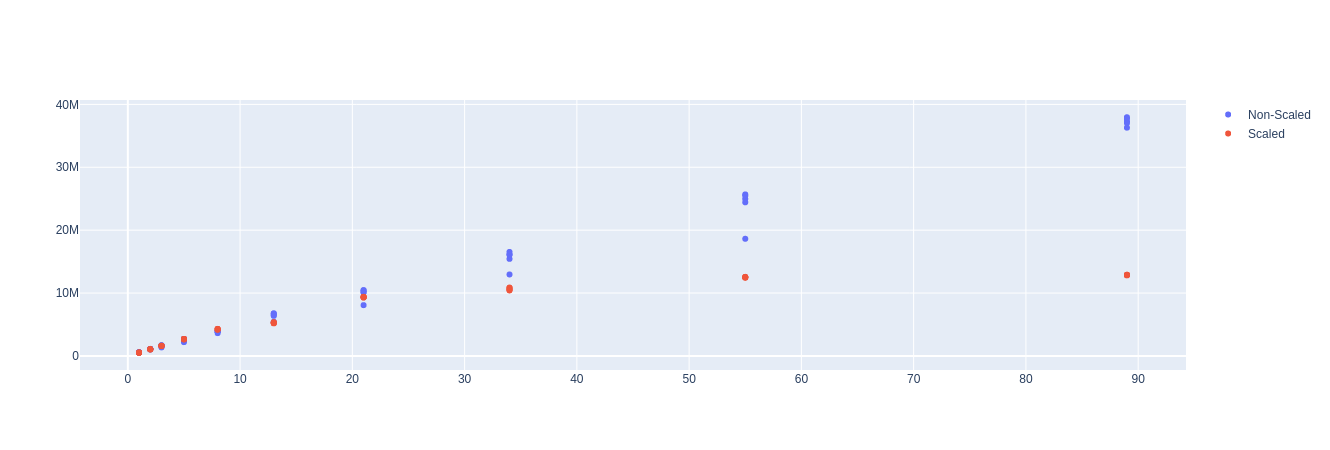

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=hashes['Node=Actor(s)'],
                         y=hashes['Hashrate'],
                         mode='markers',
                         name='Non-Scaled'))

fig.add_trace(go.Scatter(x=scaled_hashes['Node=Actor(s)'],
                         y=scaled_hashes['Hashrate'],
                         mode='markers',
                         name='Scaled'))

fig